In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta, time
import time
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from matplotlib.pylab import *



# To see all columns 
pd.set_option('display.max_columns', None)

In [3]:
merged = pd.read_csv('merged_flight_data.csv')

In [4]:
merged.shape

(706981, 47)

In [5]:
## Droping an unnecessary column 
merged.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
merged.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Carrier,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Company
0,2017,1,1,17,2,2017-01-17,AA,CLT,"Charlotte, NC",NC,North Carolina,PHX,"Phoenix, AZ",AZ,Arizona,1619,1616.0,-3.0,0.0,0.0,-1.0,1600-1659,17.0,1633.0,1837.0,5.0,1856,1842.0,-14.0,0.0,0.0,-1.0,1800-1859,0.0,NaN,0.0,277.0,266.0,244.0,1773.0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.: AA
1,2017,1,1,18,3,2017-01-18,AA,CLT,"Charlotte, NC",NC,North Carolina,PHX,"Phoenix, AZ",AZ,Arizona,1619,1614.0,-5.0,0.0,0.0,-1.0,1600-1659,13.0,1627.0,1815.0,6.0,1856,1821.0,-35.0,0.0,0.0,-2.0,1800-1859,0.0,NaN,0.0,277.0,247.0,228.0,1773.0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.: AA
2,2017,1,1,19,4,2017-01-19,AA,CLT,"Charlotte, NC",NC,North Carolina,PHX,"Phoenix, AZ",AZ,Arizona,1619,1611.0,-8.0,0.0,0.0,-1.0,1600-1659,17.0,1628.0,1824.0,2.0,1856,1826.0,-30.0,0.0,0.0,-2.0,1800-1859,0.0,NaN,0.0,277.0,255.0,236.0,1773.0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.: AA
3,2017,1,1,20,5,2017-01-20,AA,CLT,"Charlotte, NC",NC,North Carolina,PHX,"Phoenix, AZ",AZ,Arizona,1619,1656.0,37.0,37.0,1.0,2.0,1600-1659,18.0,1714.0,1926.0,3.0,1856,1929.0,33.0,33.0,1.0,2.0,1800-1859,0.0,NaN,0.0,277.0,273.0,252.0,1773.0,33.0,0.0,0.0,0.0,0.0,American Airlines Inc.: AA
4,2017,1,1,21,6,2017-01-21,AA,CLT,"Charlotte, NC",NC,North Carolina,PHX,"Phoenix, AZ",AZ,Arizona,1619,1632.0,13.0,13.0,0.0,0.0,1600-1659,17.0,1649.0,1854.0,4.0,1856,1858.0,2.0,2.0,0.0,0.0,1800-1859,0.0,NaN,0.0,277.0,266.0,245.0,1773.0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.: AA


### CLEANING/HANDLING WITH DATE AND TIME FORMAT 

We have FlightDate and CRSDepTime (Scheduled Departure Time), CRSArrTime (Scheduled Arrival Time) columns in our dataframe. 

First we will convert FlightDate to datetime object and then we will create FlightDate_Dest because Date may change when the airplane lands on the destination. 

Then we will create a flight DATETIME at origin (FlightDateTime_Origin) and destination (FlightDateTime_Dest)

In [7]:
## Changing FlightDate column to datetime object
merged.FlightDate = pd.to_datetime(merged.FlightDate)

In [8]:
## To create FligtDateTime_Origin from FlightDate and CRSDepTime columns

new_col = list()
merged.CRSDepTime[(merged.CRSDepTime == 2400)] = 0
for row in range(len(merged)):
    temp_Date = merged.FlightDate[row]
    temp_CRSDep = merged.CRSDepTime[row]
    temp_CRSDepFormatted = datetime.datetime.strptime(str(temp_CRSDep).zfill(4), "%H%M")
    temp_Hour = temp_CRSDepFormatted.hour
    temp_Min = temp_CRSDepFormatted.minute
    new_col.append(temp_Date + pd.DateOffset(hour = temp_Hour, minute = temp_Min))

/Users/serdarbozoglan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
merged['FlightDateTime_Origin'] = new_col

In [10]:
## To create a new column for the Destination Date checks whether Date changes or not at Destination

merged["FlightDate_Dest"] = np.where((merged.CRSArrTime - merged.CRSDepTime) > 0, 
                                  pd.DatetimeIndex(merged.FlightDate) + pd.DateOffset(0),
                                 pd.DatetimeIndex(merged.FlightDate) + pd.DateOffset(1))

In [11]:
## To create FlightDateTime_Dest form FlightDate and CRSArrTime columns

new_col2 = []
merged.CRSArrTime[(merged.CRSArrTime == 2400)] = 0

for row in range(len(merged)): 
    temp_Date = merged.FlightDate_Dest[row]
    temp_CRSArr = merged.CRSArrTime[row]
    temp_CRSArrFormatted = datetime.datetime.strptime(str(temp_CRSArr).zfill(4), '%H%M')
    temp_Hour = temp_CRSArrFormatted.hour
    temp_Minute = temp_CRSArrFormatted.minute
    new_col2.append(temp_Date + pd.DateOffset(hour = temp_Hour, minute = temp_Minute))

/Users/serdarbozoglan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
merged['FlightDateTime_Dest'] = new_col2

In [13]:
# We can drop the original FlightDate column, we don't need anymore
merged.drop(['FlightDate'], axis=1, inplace=True)

# We can also drop 'FlightDate_Dest column, it is needless now
merged.drop(['FlightDate_Dest'], axis=1, inplace=True)

In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706981 entries, 0 to 706980
Data columns (total 47 columns):
Year                     706981 non-null int64
Quarter                  706981 non-null int64
Month                    706981 non-null int64
DayofMonth               706981 non-null int64
DayOfWeek                706981 non-null int64
Carrier                  706981 non-null object
Origin                   706981 non-null object
OriginCityName           706981 non-null object
OriginState              706981 non-null object
OriginStateName          706981 non-null object
Dest                     706981 non-null object
DestCityName             706981 non-null object
DestState                706981 non-null object
DestStateName            706981 non-null object
CRSDepTime               706981 non-null int64
DepTime                  698164 non-null float64
DepDelay                 698159 non-null float64
DepDelayMinutes          698159 non-null float64
DepDel15                 698

In [15]:
# 2. Month name
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
merged['MonthName'] = merged['Month'].apply(lambda m: month_dict[m])

# 3. Day of the week name
dow_dict = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}
merged['DayOfWeekName'] = merged['DayOfWeek'].apply(lambda d:dow_dict[d])

## FIXING STRINGS 

In [16]:
## Removing State Abbreviation from Origin City Name and Destination City Name

merged['OriginCityName'] = merged['OriginCityName'].str.split(',').apply(lambda x: x[0])
merged['DestCityName'] = merged['DestCityName'].str.split(',').apply(lambda x: x[0])

In [17]:
merged = merged.sort_values('FlightDateTime_Origin')
merged.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Company,FlightDateTime_Origin,FlightDateTime_Dest,MonthName,DayOfWeekName
4617,2017,1,1,1,7,AA,SEA,Seattle,WA,Washington,CLT,Charlotte,NC,North Carolina,15,7.0,-8.0,0.0,0.0,-1.0,0001-0559,17.0,24.0,737.0,9.0,814,746.0,-28.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,299.0,279.0,253.0,2279.0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.: AA,2017-01-01 00:15:00,2017-01-01 08:14:00,01- January,Sunday
16413,2017,1,1,1,7,AA,SFO,San Francisco,CA,California,CLT,Charlotte,NC,North Carolina,15,7.0,-8.0,0.0,0.0,-1.0,0001-0559,12.0,19.0,744.0,8.0,805,752.0,-13.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,290.0,285.0,265.0,2296.0,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.: AA,2017-01-01 00:15:00,2017-01-01 08:05:00,01- January,Sunday
376799,2017,1,1,1,7,NK,MSP,Minneapolis,MN,Minnesota,FLL,Fort Lauderdale,FL,Florida,20,17.0,-3.0,0.0,0.0,-1.0,0001-0559,9.0,26.0,425.0,6.0,449,431.0,-18.0,0.0,0.0,-2.0,0001-0559,0.0,NaN,0.0,209.0,194.0,179.0,1487.0,NaN,NaN,NaN,NaN,NaN,Spirit Air Lines: NK,2017-01-01 00:20:00,2017-01-01 04:49:00,01- January,Sunday
466432,2017,1,1,1,7,UA,LAX,Los Angeles,CA,California,ORD,Chicago,IL,Illinois,21,38.0,17.0,17.0,1.0,1.0,0001-0559,18.0,56.0,621.0,11.0,618,632.0,14.0,14.0,0.0,0.0,0600-0659,0.0,NaN,0.0,237.0,234.0,205.0,1744.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.: UA,2017-01-01 00:21:00,2017-01-01 06:18:00,01- January,Sunday
197135,2017,1,1,1,7,DL,SEA,Seattle,WA,Washington,MSP,Minneapolis,MN,Minnesota,30,23.0,-7.0,0.0,0.0,-1.0,0001-0559,24.0,47.0,523.0,4.0,547,527.0,-20.0,0.0,0.0,-2.0,0001-0559,0.0,NaN,0.0,197.0,184.0,156.0,1399.0,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.: DL,2017-01-01 00:30:00,2017-01-01 05:47:00,01- January,Sunday


You can access the explanation regarding each column https://www.transtats.bts.gov/Fields.asp?table_id=236 

## HANDLING WITH MISSING VALUES:

In [18]:
print ('Column Name          :     ' , '# of Missing Value :    Type     : ')
print ('_____________________','    ','_____________________    __________')
for col in merged:
    space1 = " "*(26-len(merged[col].name)) ## to adjust the space
    nulls = merged[col].isnull().sum().sum() ## defines the null/NaN values
    if nulls < 10 :
        print (col, space1, nulls, '    (% {:,.4f})'.format(nulls/len(merged)), '        ', merged[col].dtypes)
    elif nulls> 1000 & nulls <10000:
         print (col, space1, nulls, ' (% {:,.4f})'.format(nulls/len(merged)), '        ', merged[col].dtypes)
    else:
         print (col, space1, nulls, '(% {:,.4f})'.format(nulls/len(merged)), '        ', merged[col].dtypes)

Column Name          :      # of Missing Value :    Type     : 
_____________________      _____________________    __________
Year                        0     (% 0.0000)          int64
Quarter                     0     (% 0.0000)          int64
Month                       0     (% 0.0000)          int64
DayofMonth                  0     (% 0.0000)          int64
DayOfWeek                   0     (% 0.0000)          int64
Carrier                     0     (% 0.0000)          object
Origin                      0     (% 0.0000)          object
OriginCityName              0     (% 0.0000)          object
OriginState                 0     (% 0.0000)          object
OriginStateName             0     (% 0.0000)          object
Dest                        0     (% 0.0000)          object
DestCityName                0     (% 0.0000)          object
DestState                   0     (% 0.0000)          object
DestStateName               0     (% 0.0000)          object
CRSDepTime              

In [19]:
merged.Cancelled.value_counts()

0.0    697903
1.0      9078
Name: Cancelled, dtype: int64

### Checking Duplicating Values

In [20]:
print(merged.duplicated().sum())

0


There is no dublicating value in our dataset

In [21]:
time_columns = ['CRSDepTime','DepTime','DepDelay', 'DepDelayMinutes','TaxiOut', 'WheelsOff', 'WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay', 
                'ArrDelayMinutes','CRSElapsedTime', 'ActualElapsedTime', 'AirTime','FlightDateTime_Origin', 'FlightDateTime_Dest', 'Cancelled']

### DepTime

In [22]:
merged[pd.isnull(merged.DepTime)][time_columns].head()

,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,FlightDateTime_Origin,FlightDateTime_Dest,Cancelled
9928,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,NaN,NaN,NaN,189.0,NaN,NaN,2017-01-01 00:30:00,2017-01-01 05:39:00,1.0
660844,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,759,NaN,NaN,NaN,129.0,NaN,NaN,2017-01-01 05:50:00,2017-01-01 07:59:00,1.0
659120,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854,NaN,NaN,NaN,159.0,NaN,NaN,2017-01-01 06:15:00,2017-01-01 08:54:00,1.0
10925,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1025,NaN,NaN,NaN,355.0,NaN,NaN,2017-01-01 06:30:00,2017-01-01 10:25:00,1.0
659167,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015,NaN,NaN,NaN,155.0,NaN,NaN,2017-01-01 06:40:00,2017-01-01 10:15:00,1.0


As we can see from the above dataframe, cancelled flights does not have DepartureTime information as normal. But more importantly, DepTime is actual Departure Time of the flight. We can only get this information when the airplane takes off, so it does not contribute in predicting cancellation in advance, so we can drop this column from our dataset  


In [23]:
merged.drop('DepTime', axis=1, inplace=True)

### DepDelay

In [24]:
merged[(pd.isnull(merged.DepDelay)) & (merged.Cancelled==1)][['Origin', 'Dest', 'FlightDateTime_Dest','DepDelay','Cancelled']].head()

,Origin,Dest,FlightDateTime_Dest,DepDelay,Cancelled
9928,LAX,DFW,2017-01-01 05:39:00,NaN,1.0
660844,SEA,SFO,2017-01-01 07:59:00,NaN,1.0
659120,SEA,LAX,2017-01-01 08:54:00,NaN,1.0
10925,JFK,PHX,2017-01-01 10:25:00,NaN,1.0
659167,SEA,DEN,2017-01-01 10:15:00,NaN,1.0


If a flight is cancelled then it will not have Depature Delay information. So it is an information regarding a happened flight. It does not give us any information to predict cancellation, so we can drop this column as well.

In [25]:
merged.drop(['DepDelay'], axis=1, inplace=True)

### DepDelayMinutes, DepDel15 and DepartureDelayGroups 
Those columns also give us information regarding happened flight so they are not related to predict cancellation, too. We can drop those columns.

In [26]:
merged.drop(['DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups'], axis=1, inplace=True)

### TaxiOut, WheelsOff, WheelsOn, TaxiIn, AirTime, ArrTime, ArrDelay, ArrDelayMinutes, ArrDel15, ArrivalDelayGroups 
Those columns also give us information regarding happened flight so they are not related to predict cancellation, too. We can drop those column

In [27]:
merged.drop(['TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'AirTime', 'ArrDelay', 'ArrTime','ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups'], axis=1, inplace=True)

### CancellationCode
CancellationCode defines the type of cancellation but does nto give us a spesific information to predict cancellation so we can drop it as well

In [28]:
merged.drop(['CancellationCode'], axis=1, inplace=True)

### Diverted, ActualElapsedTime, AirTime, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay
Those columns are also related with actual flights so we can drop them as well

In [29]:
merged.drop(['Diverted', 'ActualElapsedTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

### CRSElapsedTime

We have 2 missing value in this column.

In [30]:
merged[pd.isnull(merged['CRSElapsedTime'])].loc[:]

,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,Cancelled,CRSElapsedTime,Distance,Company,FlightDateTime_Origin,FlightDateTime_Dest,MonthName,DayOfWeekName
373423,2017,1,1,3,2,NK,ORD,Chicago,IL,Illinois,MCO,Orlando,FL,Florida,1104,1100-1159,1445,1400-1459,1.0,NaN,1005.0,Spirit Air Lines: NK,2017-01-03 11:04:00,2017-01-03 14:45:00,01- January,Tuesday


In [31]:
merged[merged.Carrier=='NK']['Company'].head(2)

376799    Spirit Air Lines: NK
371150    Spirit Air Lines: NK
Name: Company, dtype: object

We can see that CRSElapsedtime for Spirit Airlines (Carrier code is NK) has 1 missing value. We can find the mean value of same flight patern for that company and use those values to replace NaN values.

In [32]:
merged[(merged.Carrier =='NK') & (merged.Origin =='ORD') & (merged.Dest =='MCO')]['CRSElapsedTime'].mean() 

159.12542372881356

In [33]:
merged.at[373423,'CRSElapsedTime'] = 159

In [34]:
print ('Column Name          :     ' , '# of Missing Value :    Type     : ')
print ('_____________________','    ','_____________________    __________')
for col in merged:
    space1 = " "*(26-len(merged[col].name)) ## to adjust the space
    nulls = merged[col].isnull().sum().sum() ## defines the null/NaN values
    if nulls < 10 :
        print (col, space1, nulls, '    (% {:,.4f})'.format(nulls/len(merged)), '        ', merged[col].dtypes)
    elif nulls> 1000 & nulls <10000:
         print (col, space1, nulls, ' (% {:,.4f})'.format(nulls/len(merged)), '        ', merged[col].dtypes)
    else:
         print (col, space1, nulls, '(% {:,.4f})'.format(nulls/len(merged)), '        ', merged[col].dtypes)

Column Name          :      # of Missing Value :    Type     : 
_____________________      _____________________    __________
Year                        0     (% 0.0000)          int64
Quarter                     0     (% 0.0000)          int64
Month                       0     (% 0.0000)          int64
DayofMonth                  0     (% 0.0000)          int64
DayOfWeek                   0     (% 0.0000)          int64
Carrier                     0     (% 0.0000)          object
Origin                      0     (% 0.0000)          object
OriginCityName              0     (% 0.0000)          object
OriginState                 0     (% 0.0000)          object
OriginStateName             0     (% 0.0000)          object
Dest                        0     (% 0.0000)          object
DestCityName                0     (% 0.0000)          object
DestState                   0     (% 0.0000)          object
DestStateName               0     (% 0.0000)          object
CRSDepTime              

We don't have any missing value for our prediction model, now

In [35]:
merged.shape

(706981, 26)

## DATA EXPLORATION

### Setting For Visualization

Let's look at some summary statistic 

In [37]:
merged.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Cancelled,CRSElapsedTime,Distance
count,706981.0,706981.000000,706981.000000,706981.000000,706981.000000,706981.000000,706981.000000,706981.000000,706981.000000,706981.000000
mean,2017.0,1.518744,3.578279,15.652603,3.926960,1330.255143,1503.317228,0.012841,182.387736,1115.874265
std,0.0,0.499649,1.707469,8.736242,1.988149,504.579389,537.726075,0.112586,81.880803,661.968054
min,2017.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,55.000000,169.000000
25%,2017.0,1.000000,2.000000,8.000000,2.000000,905.000000,1111.000000,0.000000,119.000000,602.000000
50%,2017.0,2.000000,4.000000,16.000000,4.000000,1319.000000,1537.000000,0.000000,163.000000,946.000000
75%,2017.0,2.000000,5.000000,23.000000,6.000000,1740.000000,1939.000000,0.000000,233.000000,1562.000000
max,2017.0,2.000000,6.000000,31.000000,7.000000,2359.000000,2359.000000,1.000000,510.000000,2717.000000


### Flight Operations : 

In [38]:
cancelled = merged[merged['Cancelled'] == 1].count()['Cancelled']
scheduled = merged.count()['CRSElapsedTime']
operated = scheduled - cancelled
ratio_oper = operated / scheduled * 100
ratio_cancel = 100 - ratio_oper

print("Scheduled flights : ", scheduled)
print("Operated flights  : ", operated)
print("Cancelled flights : ",' ', cancelled)

print("\n")
print("OPERATED flights  : {:,.2f}%".format(ratio_oper))
print("CANCELLED flights :  {:,.2f}%".format(ratio_cancel))

Scheduled flights :  706981
Operated flights  :  697903
Cancelled flights :    9078


OPERATED flights  : 98.72%
CANCELLED flights :  1.28%


Eventhough cancellation rate is less than %1.5, in case of occurrance it starts changing things drastically. In this context, predicting cancellations in advance is highly important

### Oparated & Cancelled Flight Numbers

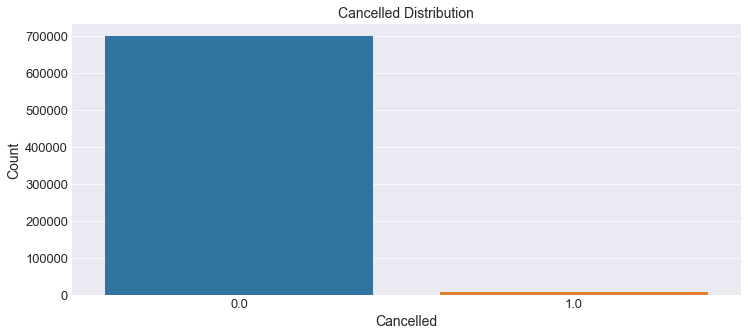

In [39]:
sns.set_style('darkgrid')
#plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,5))
#sns.violinplot( data=df, **violin_options)
sns.countplot(merged.Cancelled)
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.xlabel('Cancelled', size=14)
_ = plt.ylabel('Count', size=14)
_ = plt.title('Cancelled Distribution', size=14)

In the above graphic, 1 represents Cancelled flights and 0 Non-cancelled 

When running the summary statistics, the dependent variable of 'Cancelled' is imbalanced. There are approximately 10 thousand out of more than half million flights were cancelled.

### Flights Over Months

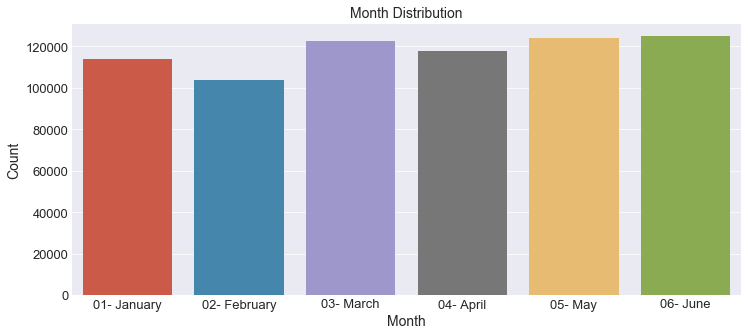

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
plt.style.use('ggplot')
sns.countplot(merged.MonthName)
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.xlabel('Month', size=14)
_ = plt.ylabel('Count', size=14)
_ = plt.title('Month Distribution', size=14)

labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[0]='Jan17'

ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The flights are almost fairly distributed among the mounths. As we would expect, due to being the shortest month February has the least flight number. 

### Flight Volumes by Companies

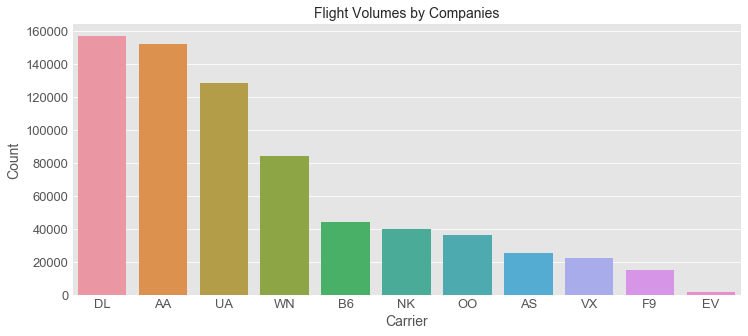

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(merged.Carrier, order=merged.Carrier.value_counts().index)
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.xlabel('Carrier', size=14)
_ = plt.ylabel('Count', size=14)
_ = plt.title('Flight Volumes by Companies', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We have 11 Airline Companies woking between selected Origin-Destination route. Those companies and their flight numbers can be seen below :

Delta Air Lines Inc.: DL        156472

American Airlines Inc.: AA      151936

United Air Lines Inc.: UA       128339

Southwest Airlines Co.: WN       84109

JetBlue Airways: B6              44595

Spirit Air Lines: NK             39846

SkyWest Airlines Inc.: OO        36478

Alaska Airlines Inc.: AS         25358

Virgin America: VX               22516

Frontier Airlines Inc.: F9       15404

ExpressJet Airlines Inc.: EV      1928

    
As seen, Airline companies' flight numbers are not normally distributed. Delta Airlines has the most of the flights while Express Airlines has the minimum flight number. Delta, American and United Airlines compose almost 60% of all flights.      

In [42]:
pvt_scheduled_airline_date = merged.pivot_table(index="MonthName",columns="Company",values="CRSElapsedTime", aggfunc=lambda x: x.count())
pvt_scheduled_airline_date

Company,Alaska Airlines Inc.: AS,American Airlines Inc.: AA,Delta Air Lines Inc.: DL,ExpressJet Airlines Inc.: EV,Frontier Airlines Inc.: F9,JetBlue Airways: B6,SkyWest Airlines Inc.: OO,Southwest Airlines Co.: WN,Spirit Air Lines: NK,United Air Lines Inc.: UA,Virgin America: VX
MonthName,,,,,,,,,,,
01- January,4069.0,25230.0,24283.0,370.0,2680.0,7283.0,5867.0,13815.0,6526.0,20091.0,3768.0
02- February,3616.0,22888.0,22368.0,294.0,2273.0,6743.0,5346.0,12258.0,5931.0,18728.0,3318.0
03- March,4300.0,26296.0,27264.0,462.0,2645.0,7570.0,6252.0,14673.0,6638.0,22557.0,3837.0
04- April,4339.0,24799.0,26516.0,315.0,2560.0,7458.0,6412.0,14305.0,6501.0,20834.0,3736.0
05- May,4586.0,26164.0,27794.0,293.0,2644.0,7806.0,6317.0,14508.0,7194.0,22945.0,3866.0
06- June,4448.0,26559.0,28247.0,194.0,2602.0,7735.0,6284.0,14550.0,7056.0,23184.0,3991.0


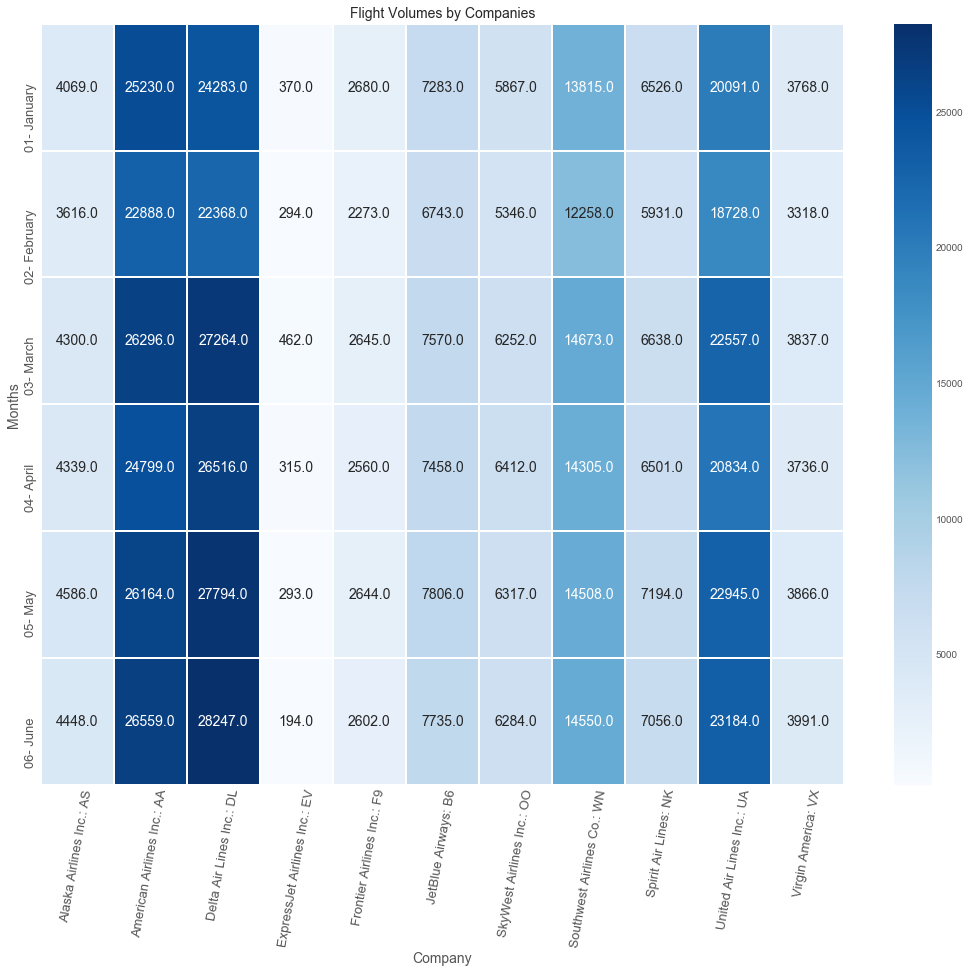

In [43]:
fig = plt.figure(figsize=(18,14))
sns.heatmap(pvt_scheduled_airline_date, fmt='', annot=True, annot_kws={"size": 14}, cmap='Blues', linecolor="w", linewidths=1)
_ = plt.xticks(size=13, rotation=80)
_ = plt.yticks(size=13)
_ = plt.xlabel('Company', size=14)
_ = plt.ylabel('Months', size=14)
_ = plt.title('Flight Volumes by Companies', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.clf()
plt.cla()
plt.close()


Through heatmap we can figure out the flight volume of each airline compnay. We can see in the previous plots and heatmap Delta Airlines is the largest Airline company in volume of flights. American Airlines is the second one and its flight volume is pretty close to Delta Airlines. And United Air Lines is the third one for the same period. We can infer that those three companies have operated flights for almost all distances across the USA and they have larger fleet than other companies. On the other hand, Express Airlines is the smallest company with the least volume. 

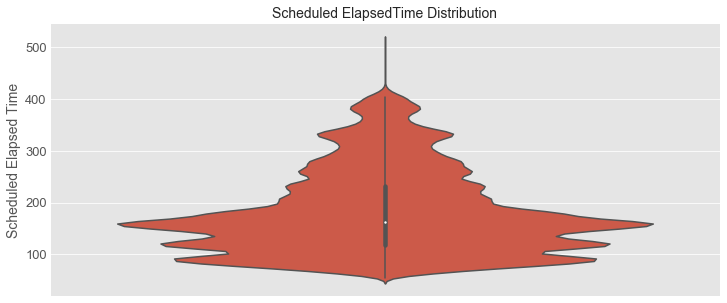

In [44]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(y='CRSElapsedTime', data=merged)
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.ylabel('Scheduled Elapsed Time', size=14)
_ = plt.title('Scheduled ElapsedTime Distribution', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The median Scheduled Elasped Time is 163 minustes and as we can see Scheduled Elasped Time has also highly right skewed distribution. Before building a model we have to transform it as well

### Operating Performance of the Companies

In [45]:
for_plt = pd.pivot_table(merged, index='MonthName', columns='Company', values='Cancelled', aggfunc='sum').sort_index()
for_plt

Company,Alaska Airlines Inc.: AS,American Airlines Inc.: AA,Delta Air Lines Inc.: DL,ExpressJet Airlines Inc.: EV,Frontier Airlines Inc.: F9,JetBlue Airways: B6,SkyWest Airlines Inc.: OO,Southwest Airlines Co.: WN,Spirit Air Lines: NK,United Air Lines Inc.: UA,Virgin America: VX
MonthName,,,,,,,,,,,
01- January,48.0,308.0,212.0,21.0,41.0,140.0,134.0,339.0,196.0,91.0,90.0
02- February,88.0,226.0,137.0,14.0,9.0,294.0,146.0,211.0,75.0,215.0,125.0
03- March,29.0,337.0,170.0,31.0,21.0,291.0,76.0,367.0,127.0,311.0,107.0
04- April,30.0,205.0,792.0,8.0,1.0,80.0,82.0,165.0,111.0,16.0,72.0
05- May,47.0,136.0,23.0,11.0,9.0,173.0,28.0,154.0,461.0,33.0,84.0
06- June,22.0,369.0,39.0,15.0,1.0,184.0,50.0,204.0,304.0,103.0,39.0


<Figure size 432x288 with 0 Axes>

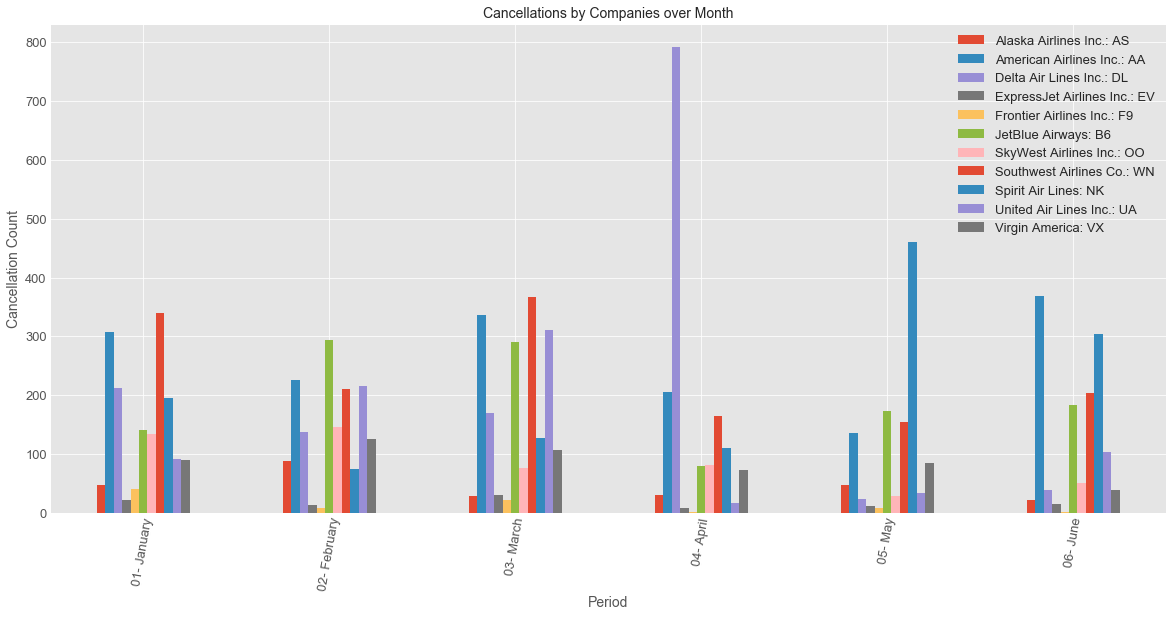

In [47]:
_ = plt.figure()
for_plt = pd.pivot_table(merged, index='MonthName', columns='Company', values='Cancelled', aggfunc='sum')

for_plt.plot(kind= 'bar', figsize=(20,9))
_ = plt.xticks(size=13, rotation=80)
_ = plt.yticks(size=13)
_ = plt.xlabel('Period', size=14)
_ = plt.ylabel('Cancellation Count', size=14)
_ = plt.title('Cancellations by Companies over Month', size=14)
_ = plt.legend(loc='best', fontsize=13)
plt.show()

When we check the cancellation numbers over the companies, cancellation rate of Delta Airline in April attracts our attentions very much. Althouhg Delta Airline is the largest company in overall for this period, it is pretty interesting that it has a huge cancellation in April. The situation of Delta Ailrline does not seem normal in April, it needs to be investigated deeply. It must have noise. Though it is not as high as Delta Air Lines' Cancellation Rate in April, but Spirit Air Lines has also high Cancellation rate in May when we compare to others. 
Frontier Air Lines has only 1 cancalled flights both in April and June it seems a big success.
As we would expect ExpressJet has the minimum Cancellation rate in overall, because it has already least flight number among all companies. 

Now lets check the cancellation rates by companies

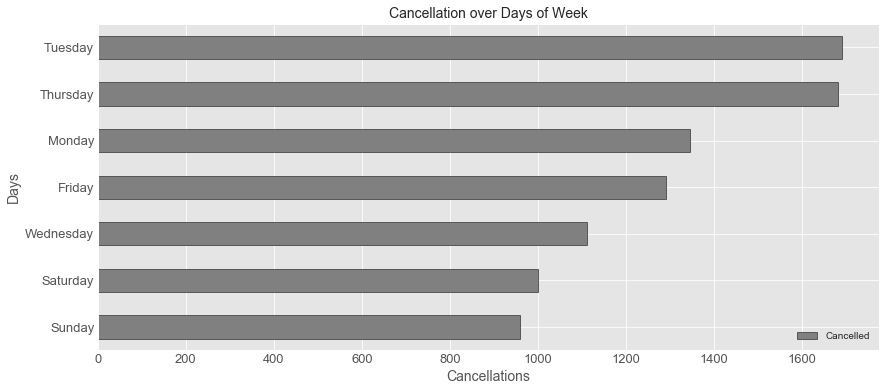

In [48]:
##Cancellations over Day of Week

#day_of_cancellation = pd.DataFrame(merged[merged.Cancelled==1].groupby('DayOfWeekName')['Cancelled'].sum())
_ = plt.figure()
#fig = plt.subplots(1,2)
cancellation_over_days = pd.DataFrame(merged.groupby('DayOfWeekName')['Cancelled'].sum())
cancellation_over_days['Cancelled'].sort_values(ascending=True).plot(kind= 'barh', figsize=(14,6), color='Gray', legend=True, edgecolor='black')
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.ylabel('Days', size=14)
_ = plt.title('Cancellation over Days of Week', size=14)
_ = plt.xlabel('Cancellations', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



When we check days in terms of cancelled flight numbers, Tuesday has the most cancelled flights and Thusrday  has the second highest cancelled flights. 
If you are planning to have a flight you may have a higher chance of cancellation  

In [49]:
# Each airline is either cancelled or operated.

# Operation_rank_airlines shows cancellations and operated flights

operation_ranks_airlines = pd.DataFrame(merged.groupby('Company').count()['CRSElapsedTime'])
operation_ranks_airlines['Scheduled_Flights'] = operation_ranks_airlines['CRSElapsedTime']
operation_ranks_airlines['Cancelled']=merged.groupby('Company').sum()['Cancelled'].astype('int')
operation_ranks_airlines['Operated']=operation_ranks_airlines['CRSElapsedTime']-operation_ranks_airlines['Cancelled'].astype('int')
operation_ranks_airlines['Ratio_Operated']=operation_ranks_airlines['Operated']/operation_ranks_airlines['CRSElapsedTime']
operation_ranks_airlines['Ratio_Cancelled'] = 1- operation_ranks_airlines['Ratio_Operated']
operation_ranks_airlines.drop(operation_ranks_airlines.columns[[0]],axis=1,inplace=True)
operation_ranks_airlines

,Scheduled_Flights,Cancelled,Operated,Ratio_Operated,Ratio_Cancelled
Company,,,,,
Alaska Airlines Inc.: AS,25358,264,25094,0.989589,0.010411
American Airlines Inc.: AA,151936,1581,150355,0.989594,0.010406
Delta Air Lines Inc.: DL,156472,1373,155099,0.991225,0.008775
ExpressJet Airlines Inc.: EV,1928,100,1828,0.948133,0.051867
Frontier Airlines Inc.: F9,15404,82,15322,0.994677,0.005323
JetBlue Airways: B6,44595,1162,43433,0.973943,0.026057
SkyWest Airlines Inc.: OO,36478,516,35962,0.985854,0.014146
Southwest Airlines Co.: WN,84109,1440,82669,0.982879,0.017121
Spirit Air Lines: NK,39846,1274,38572,0.968027,0.031973


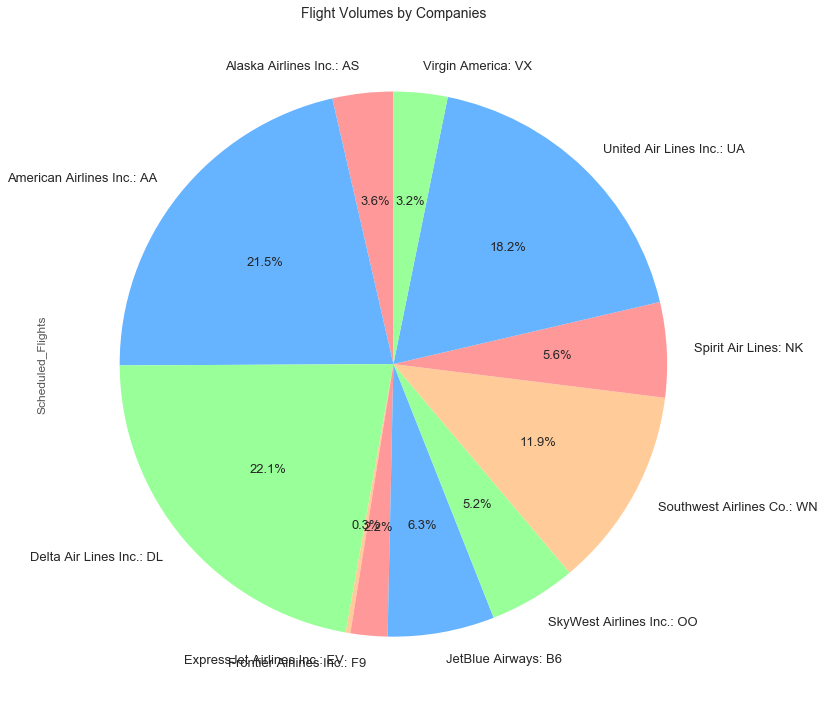

In [50]:
_ = plt.figure()
fig = plt.figure(1, figsize=(10,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
(operation_ranks_airlines['Scheduled_Flights']).plot.pie(figsize=(10,10), fontsize = 13, colors=colors, autopct='%1.1f%%', startangle=90)
_ = plt.title('Flight Volumes by Companies', size=14)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

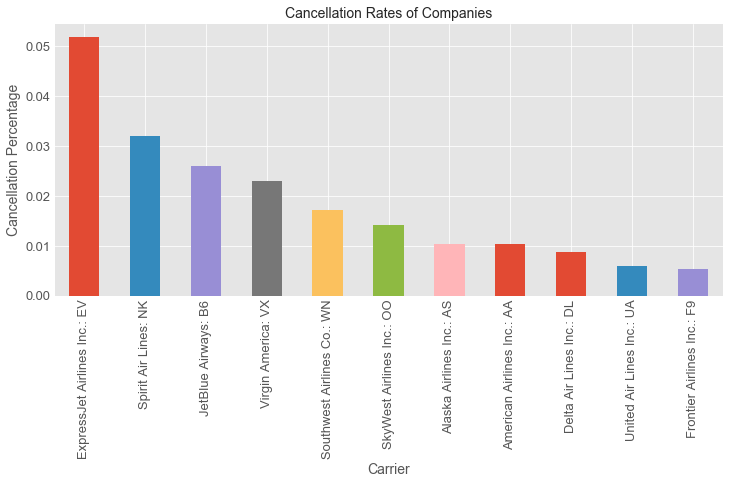

In [51]:
_ = plt.figure()
fig, ax = plt.subplots(figsize=(12,5))
operation_ranks_airlines.Ratio_Cancelled.sort_values(ascending=False).plot(kind='bar')
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.xlabel('Carrier', size=14)
_ = plt.ylabel('Cancellation Percentage', size=14)
_ = plt.title('Cancellation Rates of Companies', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We can see that in terms of Cancellation Rates of the companies, Express Airlines has the highest cancellation rate of 5%. Every one of 20 flights of Express Airline was cancelled. If you have a flight with Express Airlines you have a higher chance of cancellation. On the other hand Frontier Airlines has the minimum Cancellation rate and it has a good reputation for this term. 

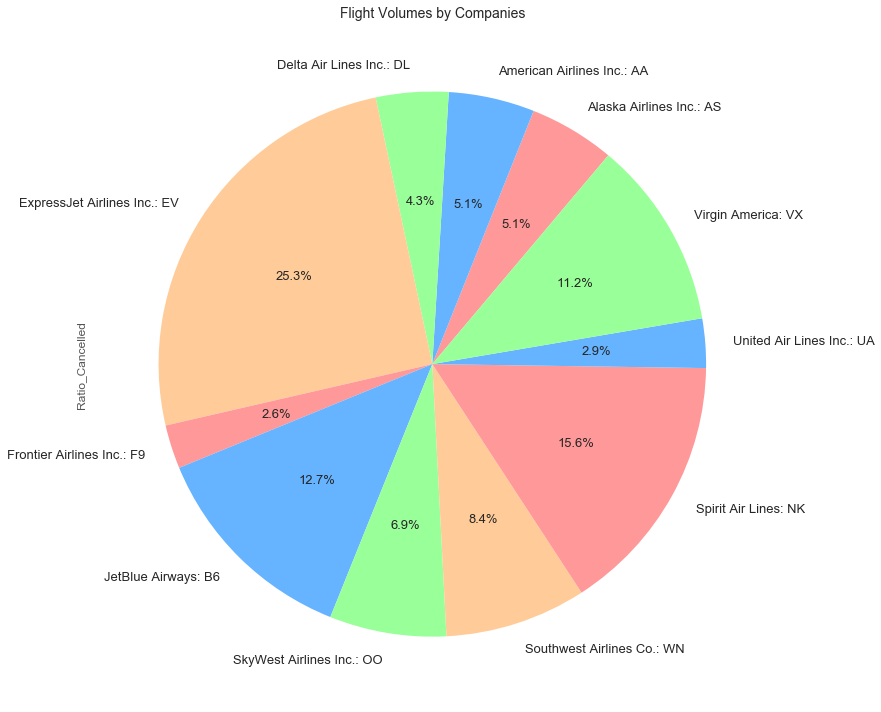

In [52]:
_ = plt.figure()
fig = plt.figure(1, figsize=(10,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
(operation_ranks_airlines['Ratio_Cancelled']/np.sum(operation_ranks_airlines['Ratio_Cancelled'])*100).plot.pie(figsize=(10,10), fontsize = 13, colors=colors, autopct='%1.1f%%', startangle=50)
_ = plt.title('Flight Volumes by Companies', size=14)
plt.tight_layout()
plt.show()

When we check the cancallation rates for each company. Express Airlines composes 25% of the all cancellations. On the contrary, United Airlines has the minimum percentage of the all cancellation.   

### Distance Aspect

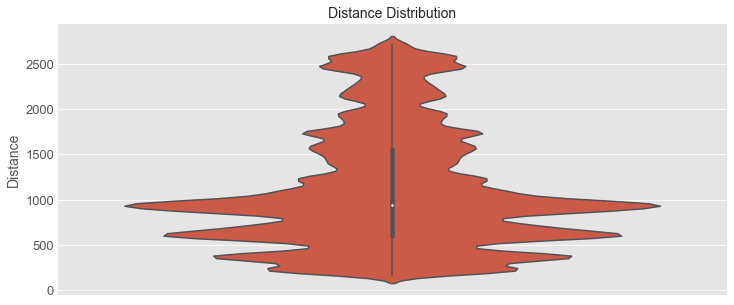

In [53]:
fig, ax = plt.subplots(figsize=(12,5))

ax = sns.violinplot(y='Distance',data=merged)
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.ylabel('Distance', size=14)
_ = plt.title('Distance Distribution', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Median flight distance is araound 1000 mile. And distance has a highly right skewed distribution. We need to transform this varible before modeling, if we keep it in our model.

### Bivariate Analysis

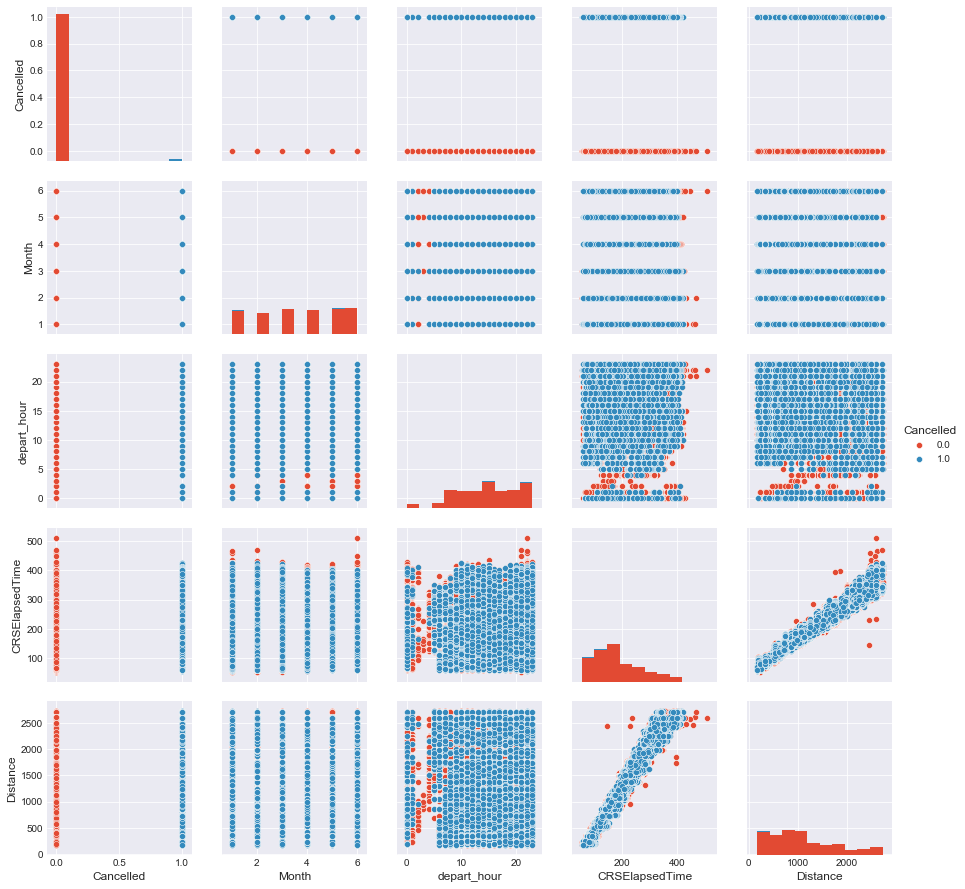

In [54]:
merged['depart_hour'] = merged.FlightDateTime_Dest.dt.hour
sns.set_style('darkgrid')
sns.pairplot(merged[['Cancelled','Month','depart_hour','CRSElapsedTime','Distance']],hue='Cancelled')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

As we can visually understand from the paiplots there seems to be a strong positive correlation between Scheduled Elasped Time and Distance. Let's get look at it closer through the larger scatter plot below. 

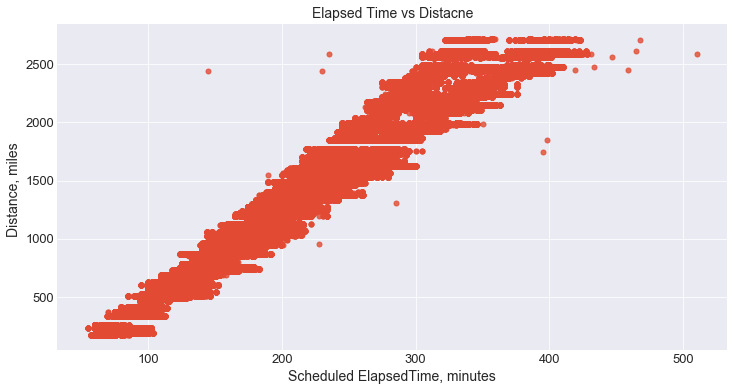

In [55]:
fig, ax  =  plt.subplots(figsize=(12,6))
ax.plot(merged.CRSElapsedTime, merged.Distance, marker='o', linestyle='', ms=5, alpha=0.8)
plt.xlabel("CRSElapsedTime, mins")
plt.ylabel("Distance, miles")
_ = plt.xticks(size=13)
_ = plt.yticks(size=13)
_ = plt.xlabel('Scheduled ElapsedTime, minutes', size=14)
_ = plt.ylabel('Distance, miles ', size=14)
_ = plt.title('Elapsed Time vs Distacne', size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Visually, we can observe a positive correlation with few outliers. For some distances there are many CRSElapsedTime. This could be due to time-zone difference, or because of changes in reservation system for same distance flights. Here we will perform a hypothesis test to check the correlation. In this context we will start with calculating a Pearson correlation coefficient. But as it is known for this calculation both CRSElapsedTime and Distance have to be normally distributed. Then, let us check their distribution first.

If the correlation is proved then we are supposed to include only one of both varibles into our model. 

/Users/serdarbozoglan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


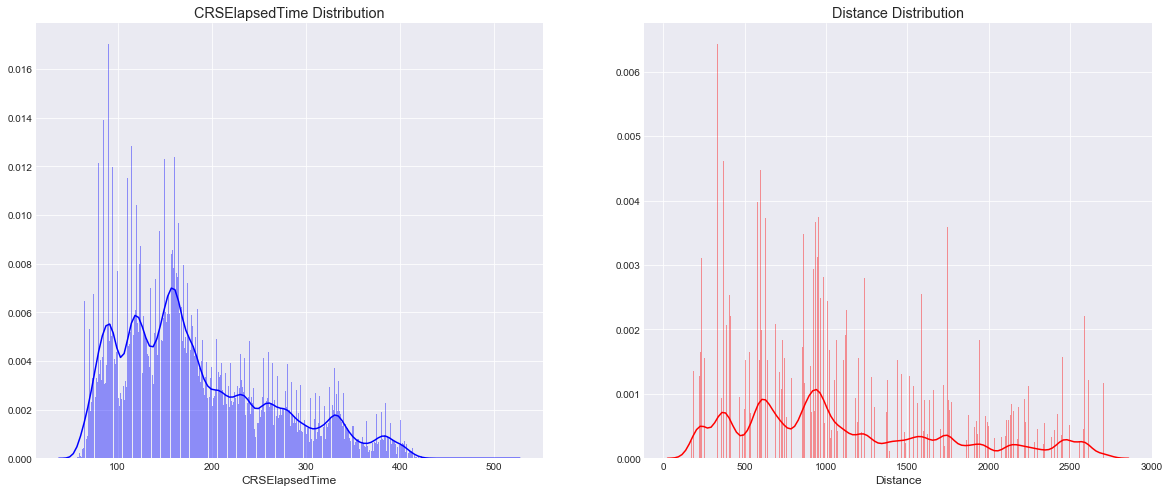

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
sns.distplot(merged.CRSElapsedTime, 500, ax=ax1,color='b')
ax1.set_title("CRSElapsedTime Distribution")
sns.distplot(merged.Distance, 500, ax=ax2, color='r')
ax2.set_title("Distance Distribution")
plt.show()

From the figures they don't seem be normal distributions. So we are supposed to test the p-values 

In [57]:
from scipy import stats
stats.normaltest(merged.CRSElapsedTime)

NormaltestResult(statistic=59307.50164488665, pvalue=0.0)

In [58]:
stats.normaltest(merged.Distance)

NormaltestResult(statistic=59238.03827864888, pvalue=0.0)

For both pvalue are 0 and less than 0.05 so we can rejct the null hypothesis. It suggests that the the distribution is not normal. We cannot use Pearson's correlation coefficient in this case, but a non-parametric test such as Spearman's test. It is time to calculate the Spearman's correlation coefficient to check the correlation between CRSElepasedTime and Distance.

In [59]:
stats.spearmanr(merged.CRSElapsedTime, merged.Distance)

SpearmanrResult(correlation=0.9832756089739176, pvalue=0.0)

According to the test result we can reject the null hypothesis suggesting there is no correlation between varaibales, and accept the alternate hypothesis suggesting there is pretty strong positive correlation (98%) between two variables. We can also confirm this correlation through heatmap.

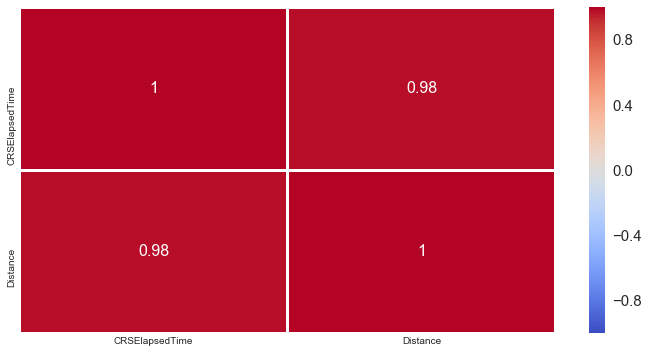

In [60]:
fig = plt.subplots(figsize=(12,6))
sns.set(font_scale=1.5)

corr = merged[['CRSElapsedTime','Distance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 16}, vmin=-1, vmax=1, lw=2)

After double check, now we can drop <font color='red' size=4>one of both varibles</font> from our data set.

Now it is time to find which variable is supposed to be dropped from our model. 

For this aim, now let's use t-test to check whether Cancelled varibale has an association with either CRSElapsedTime or Distance

First, we will compare the mean value of the CRSElapsedTime variable between Cancelled and Non-canceled flights. We want to use a T-test, but  Welch's T-test, yet as we detected earlier there is a quite imbalance between Cancelled and Non-cancelled.

As it is known T-test/Welch's T test requires/assumes normally distributed data. We have a problem here because as we observed earlier, the CRSElapsedTime and Distance variables are not distributed normally. In this context, first we are supossed to transform these variables into normalization. Our preference to do so is Box-Cox transformation.

You can see the original data distribution graphic to remeber on the left and transformed data on the right graphic.

/Users/serdarbozoglan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'CRSElapsedTime Distribution (After Transform)')

<Figure size 432x288 with 0 Axes>

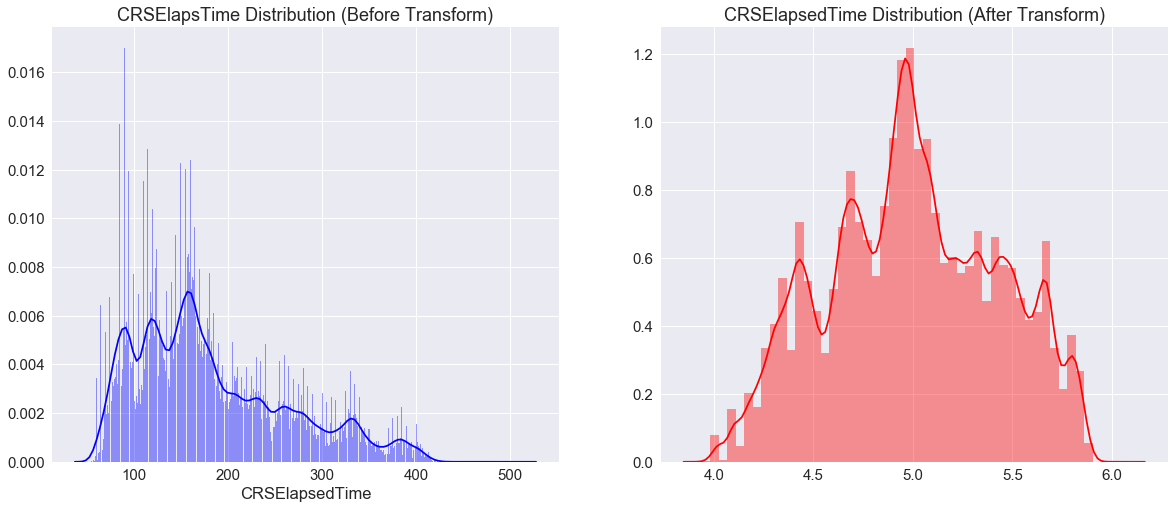

In [61]:
_ = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1 = sns.distplot(merged.CRSElapsedTime, 500, ax=ax1,color='b')
ax1.set_title('CRSElapsTime Distribution (Before Transform)')

ax2 = sns.distplot(stats.boxcox(merged['CRSElapsedTime'])[0], ax=ax2, color='r')
ax2.set_title('CRSElapsedTime Distribution (After Transform)')

We will do the same thing for Distance variable. 

/Users/serdarbozoglan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distance Distribution (After Transform)')

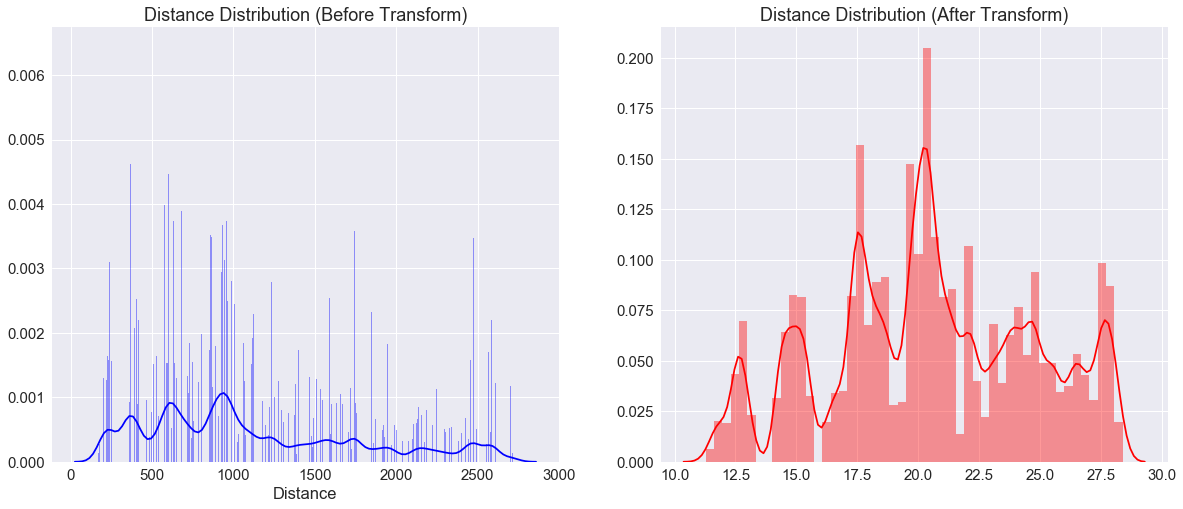

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1 = sns.distplot(merged.Distance, 500, ax=ax1,color='b')
ax1.set_title('Distance Distribution (Before Transform)')

ax2 = sns.distplot(stats.boxcox(merged['Distance'])[0], ax=ax2, color='r')
ax2.set_title('Distance Distribution (After Transform)')

Although both varibales do not seem perfectly normally distributed, but they look much better after Box-Cox transformation. Now, we can perform T-test with those transformed variables. 

The hypothesis of T-test for those variables:

H0 : The means between Cancelled and Non-cancelled are the same
H1 : The means between Cancelled and Non-cancelled are NOT the same

Alpha : 0.05 ==> C.I. :0.95

In [63]:
t, p = stats.ttest_ind(stats.boxcox(merged[merged['Cancelled'] == 0].CRSElapsedTime)[0], 
                       stats.boxcox(merged[merged['Cancelled'] == 1].CRSElapsedTime)[0], 
                       equal_var=False)

print('CRSElapsedTime for Cancelled vs. Non-cancelled Flights')
print('------------------------------------------------------')
print('t-statistic: %s' % t)
print('p-value    : %s' % p)

CRSElapsedTime for Cancelled vs. Non-cancelled Flights
------------------------------------------------------
t-statistic: 1066.5974767384707
p-value    : 0.0


T-test for CRSElapsedTime: The T-statistic is 1014.6 and the p-value is 0. This p-value is strictly below our alpha of 0.05 and therefore we can safely reject the null hypothesis. There is statistically significant evidence that the mean CRSElapsedTime values for Cancelled and Non-canceled flights are not the same.

In [64]:
t, p = stats.ttest_ind(stats.boxcox(merged[merged['Cancelled'] == 0].Distance)[0], 
                       stats.boxcox(merged[merged['Cancelled'] == 1].Distance)[0], 
                       equal_var=False)

print('Distance for Cancelled vs. Non-cancelled Flights')
print('------------------------------------------------------')
print('t-statistic: %s' % t)
print('p-value    : %s' % p)

Distance for Cancelled vs. Non-cancelled Flights
------------------------------------------------------
t-statistic: 455.1296262201459
p-value    : 0.0


T-test for Distance: The T-statistic is 353 and the p-value is 0. This p-value also is far below our alpha of 0.05 and therefore we can safely reject the null hypothesis, as well. There is statistically significant evidence that the mean Distance values for Cancelled and Non-canceled flights are not the same.

We have already prove that Distance and CRSElapsedTime have a strong positive correlataion with each other and decide to remove one of both from our model. We see that t-statistic of CRSElapsedTime is greater than 
t-statistic of Distance so we decided to include CRSElapseTime to our model rather than Distance

In [65]:
merged.drop(['Distance'], axis=1, inplace=True)

### FEATURE ENGINEERING 

So far we explore our data and now it is time for modification to build our model. We will copy of our current DataFrame juct in case of making a mistake.

In [66]:
## merged_f : merged final 

merged_f = merged.copy()

#### Variable Transformation

First, we need to perform the transformation on CRSElapsedTime that was discussed earlier. The transformed values will be stored in a new column called "CRSElapsedTime_transform".

In [67]:
merged_f['CRSElapsedTime_transform'] = stats.boxcox(merged_f['CRSElapsedTime'])[0]

merged_f.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,Cancelled,CRSElapsedTime,Company,FlightDateTime_Origin,FlightDateTime_Dest,MonthName,DayOfWeekName,depart_hour,CRSElapsedTime_transform
4617,2017,1,1,1,7,AA,SEA,Seattle,WA,Washington,CLT,Charlotte,NC,North Carolina,15,0001-0559,814,0800-0859,0.0,299.0,American Airlines Inc.: AA,2017-01-01 00:15:00,2017-01-01 08:14:00,01- January,Sunday,8,5.564973
16413,2017,1,1,1,7,AA,SFO,San Francisco,CA,California,CLT,Charlotte,NC,North Carolina,15,0001-0559,805,0800-0859,0.0,290.0,American Airlines Inc.: AA,2017-01-01 00:15:00,2017-01-01 08:05:00,01- January,Sunday,8,5.535847
376799,2017,1,1,1,7,NK,MSP,Minneapolis,MN,Minnesota,FLL,Fort Lauderdale,FL,Florida,20,0001-0559,449,0001-0559,0.0,209.0,Spirit Air Lines: NK,2017-01-01 00:20:00,2017-01-01 04:49:00,01- January,Sunday,4,5.223230
466432,2017,1,1,1,7,UA,LAX,Los Angeles,CA,California,ORD,Chicago,IL,Illinois,21,0001-0559,618,0600-0659,0.0,237.0,United Air Lines Inc.: UA,2017-01-01 00:21:00,2017-01-01 06:18:00,01- January,Sunday,6,5.343328
197135,2017,1,1,1,7,DL,SEA,Seattle,WA,Washington,MSP,Minneapolis,MN,Minnesota,30,0001-0559,547,0001-0559,0.0,197.0,Delta Air Lines Inc.: DL,2017-01-01 00:30:00,2017-01-01 05:47:00,01- January,Sunday,5,5.166702


In [68]:
redundat_columns = ['CRSElapsedTime','DestStateName', 'MonthName', 'Company', 'ArrTimeBlk', 'OriginCityName', 'OriginState', 'OriginStateName', 'DestCityName', 'DestState','CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'FlightDateTime_Origin', 'FlightDateTime_Dest', 'DayOfWeekName', 'depart_hour']

In [69]:
merged_f.drop(redundat_columns, axis=1, inplace=True)
merged_f.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,Dest,Cancelled,CRSElapsedTime_transform
4617,2017,1,1,1,7,AA,SEA,CLT,0.0,5.564973
16413,2017,1,1,1,7,AA,SFO,CLT,0.0,5.535847
376799,2017,1,1,1,7,NK,MSP,FLL,0.0,5.223230
466432,2017,1,1,1,7,UA,LAX,ORD,0.0,5.343328
197135,2017,1,1,1,7,DL,SEA,MSP,0.0,5.166702


In [70]:
categorical_var = ['Carrier', 'Origin', 'Dest']

### Converting categorical values to numerical values 

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encod = LabelEncoder()
temp = merged_f[categorical_var].apply(label_encod.fit_transform)

In [72]:
merged_f.drop(categorical_var, axis=1, inplace=True)
merged_f = pd.concat([merged_f, temp], axis=1)

In [73]:
merged_f.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Cancelled,CRSElapsedTime_transform,Carrier,Origin,Dest
4617,2017,1,1,1,7,0.0,5.564973,0,17,3
16413,2017,1,1,1,7,0.0,5.535847,0,18,3
376799,2017,1,1,1,7,0.0,5.223230,6,14,8
466432,2017,1,1,1,7,0.0,5.343328,8,12,15
197135,2017,1,1,1,7,0.0,5.166702,3,17,14


### Model Building

Since the data has been explored and cleaned so far, now we can start with building our model. In this context, first we need to define our train and test datasets. We will hold out 20% of the data as a test set and use the rest to train the model. We will also split the dependent variable ('Canceled') out from the independent variables. This will result in 4 new variables: X_train, X_test, y_train, and y_test.

### Creating Target and Feature Matrix

In [74]:
y = merged.Cancelled.astype(int).values
X = merged_f.drop(["Cancelled"], axis=1).values

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In order to avoid overfitting the model, we will use k-fold cross validation on the training dataset. We will start by using 10 folds and adjust accordingly if model computation time is too lengthy.

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

We need to start with the creation of cross validation object

In [77]:
kfold = StratifiedKFold(n_splits=10, random_state=33)

### Logistic Regression

Now it is time for building our model. We will use Logistic Regression for our study. As we mentioned earlier the dependent variable (y) is not distributed evenly, so we are supposed to use balanced weighting to avoid side effect of this situation. Additionally, we will use all independent variables to build our model to simplify. But it should be kept in mind that for more precise model, definitely much more time needs to be spent on feature selection. This part of the study may take into consideration as a future study.

In [78]:
logreg_model = LogisticRegressionCV(cv=kfold, class_weight='balanced',random_state=33)
logreg_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced',
           cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=33, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

We can use many metrics to evaluate a model. Due to imbalanced of the dependent variable (there is a huge difference between Cancelled and Non-cancelled flight numbers), accuracy would not be the best metric to evaluate the model. Hence, we will consider other evaualtion metrics such as logarithmic loss and area under the ROC curve to evaluate how good our model is.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

In [80]:
def evaluation_scores(model, X_train, y_train, cv):
    accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    log_loss = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    roc_auc  = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

    print('Mean Accuracy            : {}'.format(accuracy.mean()))
    print('Mean Log Loss            : {}'.format(log_loss.mean()))
    print('Mean Area Under ROC Curve: {}'.format(roc_auc.mean()))
    #print('Mean Log Loss            : %s' % log_loss.mean())
    #print('Mean Area Under ROC Curve: %s' % roc_auc.mean())
    
evaluation_scores(logreg_model, X_train, y_train, kfold)

Mean Accuracy            : 0.5829673199260502
Mean Log Loss            : -0.6669741513012806
Mean Area Under ROC Curve: 0.6376050557930475


The mean accuracy of this model across the ten folds used in cross validation is around 58%. This is somewhat mediocre, but as we noted earlier, accuracy is not necessarily the most relevant model evaluation metric in this case.

The mean log loss is also somewhat mediocre at 0.66.

The area under the ROC curve of 0.64 is better than random (0.5 is as good as random).

As a future study, we would try to improve this model by tuning the hyperparameters. In order to constrain the scope of this project, we will forego this step. For now, let's look at how the model does with the test dataset and evaluate a couple other modeling algorithms.

In [81]:
logreg_model.score(X_test,y_test)

0.5807124620748673

The accuracy score for the test set is very close to the mean accuracy produced by cross validation on the train set. We can consdider it as a good sign, as it indicates that the model generalizes well to new data.

Now it is time for prediction by our model for new data 

In [82]:
y_pred_logreg = logreg_model.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred_logreg))

             precision    recall  f1-score   support

          0       0.99      0.58      0.73    139588
          1       0.02      0.65      0.04      1809

avg / total       0.98      0.58      0.72    141397



The average precision for this model is 0.98, which is decent. But when looking closer, we can see that the precision for values of 0 is almost perfect (0.99) and for values of 1 it is pretty bad (0.02).

The recall of 0.58 is somewhat middle of the road.

Let's take a look at the confusion matrix to more easily visualize what's going on here.

Text(0.5,11,'Predicted Label')

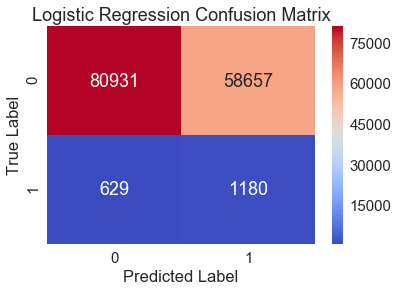

In [85]:
logreg_conf_mat = confusion_matrix(y_test,y_pred_logreg)

ax = sns.heatmap(logreg_conf_mat,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

 When looking at the confusion matrix, we can see that this model produced lots of true negatives (80931), but almost as many false positives (58657). When comparing those numbers with the number of false negatives (629) and true positives (1180), it appears that this model may be predicting too many flight cancellations.

### k-Nearest Neighbor

In [86]:
from sklearn.neighbors import KNeighborsClassifier

Normally, we would loop through multiple different numbers of neighbors to use when creating a k-NN classifier and determine which value is optimal. To constrain the scope of this project, we will just use a value of 5 for now.

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
evaluation_scores(knn_model, X_train, y_train, kfold)

Mean Accuracy            : 0.987310460653411
Mean Log Loss            : -0.23413968276038521
Mean Area Under ROC Curve: 0.7442634518385834


When running our k-NN model on the test data set using 5 fold stratified cross validation, we get a mean accuracy score of 98.7%. This is the higher accuracy than logistic regression model's accuracy. However, having said that earlier relying solely on the accuracy score would be misleading, but we can see that the log loss and the area under the ROC curve are better than the previuos model as well. Second model is better than the prevous one so far.

In [89]:
knn_model.score(X_test,y_test)

0.9870718614963543

The test accuracy is again similar to the train set, so the model does appear to generalize well.

In [93]:
y_pred_knn = knn_model.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    139588
          1       0.48      0.15      0.23      1809

avg / total       0.98      0.99      0.98    141397



Text(0.5,11,'Predicted Label')

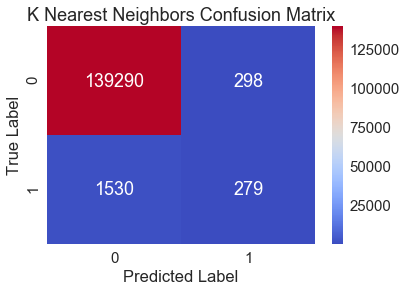

In [95]:
knn_cm = confusion_matrix(y_test,y_pred_knn)

ax = sns.heatmap(knn_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('K Nearest Neighbors Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')